**Projet**: Analyse des données du TITANIC

**Objectif**:

- Développer un modele de machine learning capable de prédire le statut (mort ou vivant) d'une personne quelconque comme s'il avait été présent sur le bateau du TITANIC lors du naufrage en considérant sa classe, son age, son sexe.

**Outils utilisés:**

- Python: Langage de programmation
- Pandas: Librairie pour la manipulation des tableaux de données.
- Numpy: Librairie pour les calculs scientifiques sur les tableaux de données de n dimensions.
- sklearn: Librairie utilisée pour l'apprentissage automatique.
- seaborn: Librairie utilisée pour la visualisation des données.
- Jupiter: Application web utilisée pour programmer en python.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns


**Chargeons le jeu de données**

In [3]:
data = pd.read_excel('/content/titanic3.xls')
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


**Sélection des caractéristiques (Feature Selection)**

In [4]:
data = data.drop(['name', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)

**Notre nouveau jeu de donnée**

In [5]:
data.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


**Representation graphique des survivants**

<Axes: xlabel='pclass', ylabel='survived'>

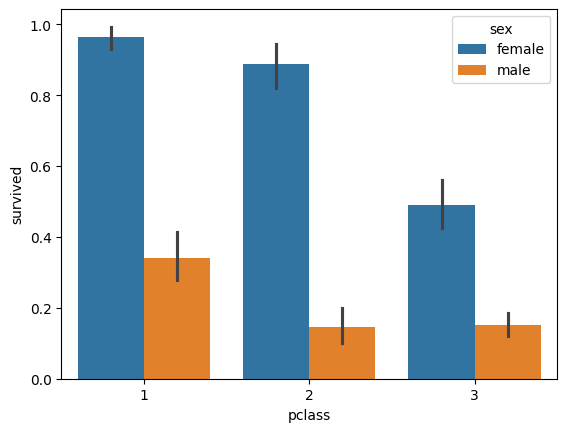

In [7]:
sns.barplot(x="pclass", y="survived", hue="sex", data=data)


De cette visualisation, il ressort que dans les 3 classes, les femmes sont celles qui ont bien plus survécu que les hommes.

**Utilisons les stats descriptives pour comprendre le comportement de nos données**

In [9]:
data.describe()

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


Ces statistiques nous montrent que notre dataset contient des valeurs manquantes.

In [10]:
data = data.dropna(axis=0)
data['sex'].replace(['male', 'female'], [0, 1], inplace=True)
data.head()

/tmp/ipython-input-3841473844.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['sex'].replace(['male', 'female'], [0, 1], inplace=True)
/tmp/ipython-input-3841473844.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sex'].replace(['male', 'female'], [0, 1], inplace=True)
/tmp/ipython

,pclass,survived,sex,age
0,1,1,1,29.0000
1,1,1,0,0.9167
2,1,0,1,2.0000
3,1,0,0,30.0000
4,1,0,1,25.0000


In [11]:
data.describe()

,pclass,survived,sex,age
count,1046.000000,1046.000000,1046.000000,1046.000000
mean,2.207457,0.408222,0.370937,29.881135
std,0.841497,0.491740,0.483287,14.413500
min,1.000000,0.000000,0.000000,0.166700
25%,1.000000,0.000000,0.000000,21.000000
50%,2.000000,0.000000,0.000000,28.000000
75%,3.000000,1.000000,1.000000,39.000000
max,3.000000,1.000000,1.000000,80.000000


**Développons le modele de machine learning**

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [13]:
model = KNeighborsClassifier()
Y = data['survived']
X = data.drop('survived', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
model.fit(X_train, y_train)
print("Score en test:", model.score(X_test, y_test))

Score en test: 0.8095238095238095


Mon modele de machine learning est fiable a 80.95% lors de ses predictions.

**Fonction pour appliquer notre modele**

In [14]:
def survie(model, pclass, sex, age):
    test = np.array([pclass, sex, age]).reshape(1, 3)
    print(model.predict(test))
    print(model.predict_proba(test))

survie(model, 3, 0, 20)


[0]
[[1. 0.]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Grace a cette fonction, nous avons pu tester notre modele en essayant de prédire le statut (mort ou vivant) d'une personne quelconque qui aurait été a la 3eme classe, qui serait de sexe masculin et qui serait agée de 20 ans. Comme résultat, l'individu en question aurait 100% de chance de ne pas avoir survécu au naufrage et aucune de chance de survivre au naufrage.